#### Flight Price Prediction

##### Problem Statement:
- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

1. Size of training set: 10683 records

#### FEATURES:
1. Airline: The name of the airline.

2. Date_of_Journey: The date of the journey

3. Source: The source from which the service begins.

4. Destination: The destination where the service ends.

5. Route: The route taken by the flight to reach the destination.

6. Dep_Time: The time when the journey starts from the source.

7. Arrival_Time: Time of arrival at the destination.

8. Duration: Total duration of the flight.

9. Total_Stops: Total stops between the source and destination.

10. Additional_Info: Additional information about the flight

11. Price: The price of the ticket

# Import Libraries and Datasets

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the excel file 
flight = pd.read_excel("Data_Train.xlsx")

In [3]:
# check the first five records
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# check the shape of the dataframe
flight.shape

(10683, 11)

### There are 10683 records and 11 columns

# Identify the problem : Regression

In [5]:
# check datatype
flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
#inspect the unique values
for x in flight.columns:
    print(flight[x].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

### Observation:

- The target variable is numeric and hence the regression models will be used for prediciton of price

# Exploratory Data Analysis and Data Cleaning

### Univariate analysis

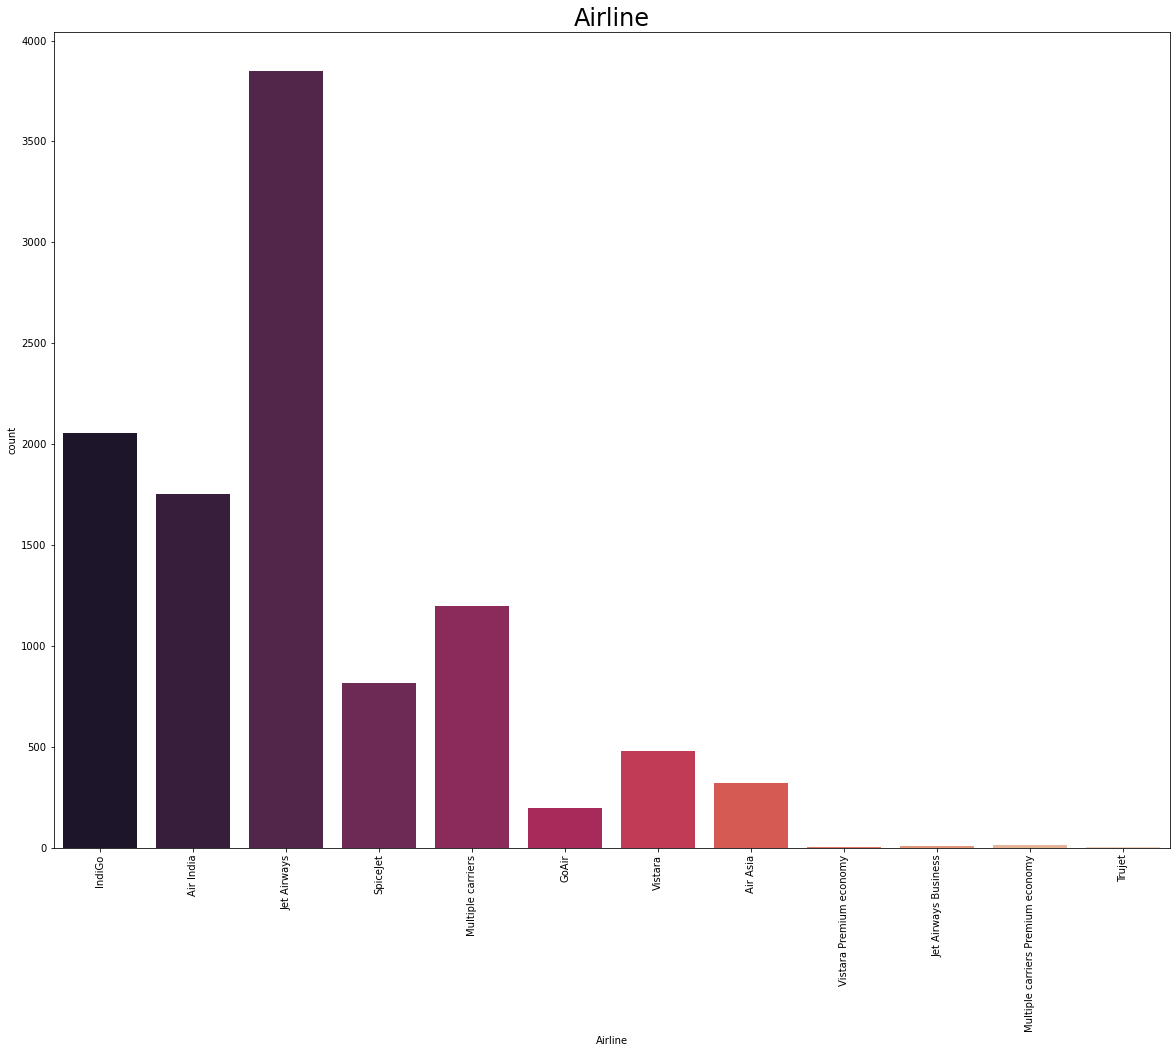

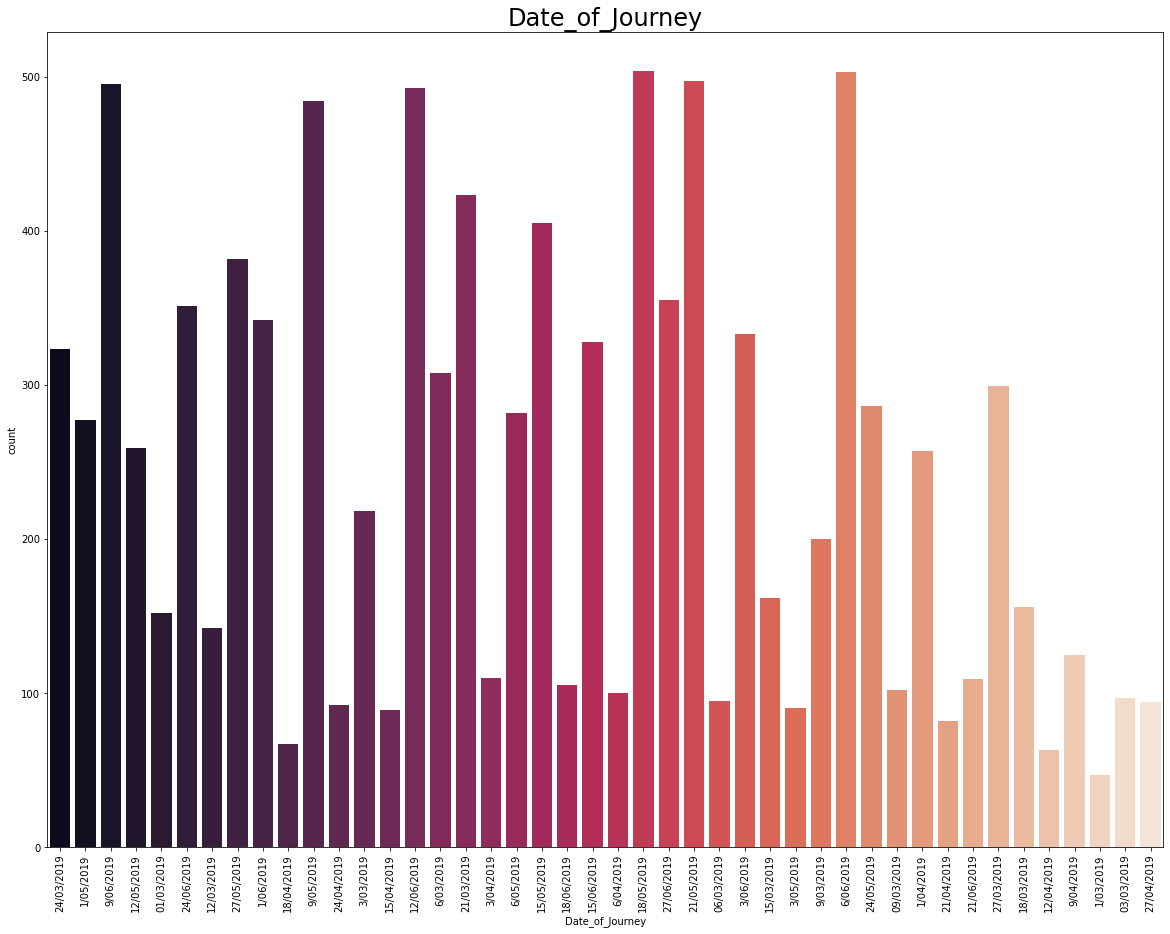

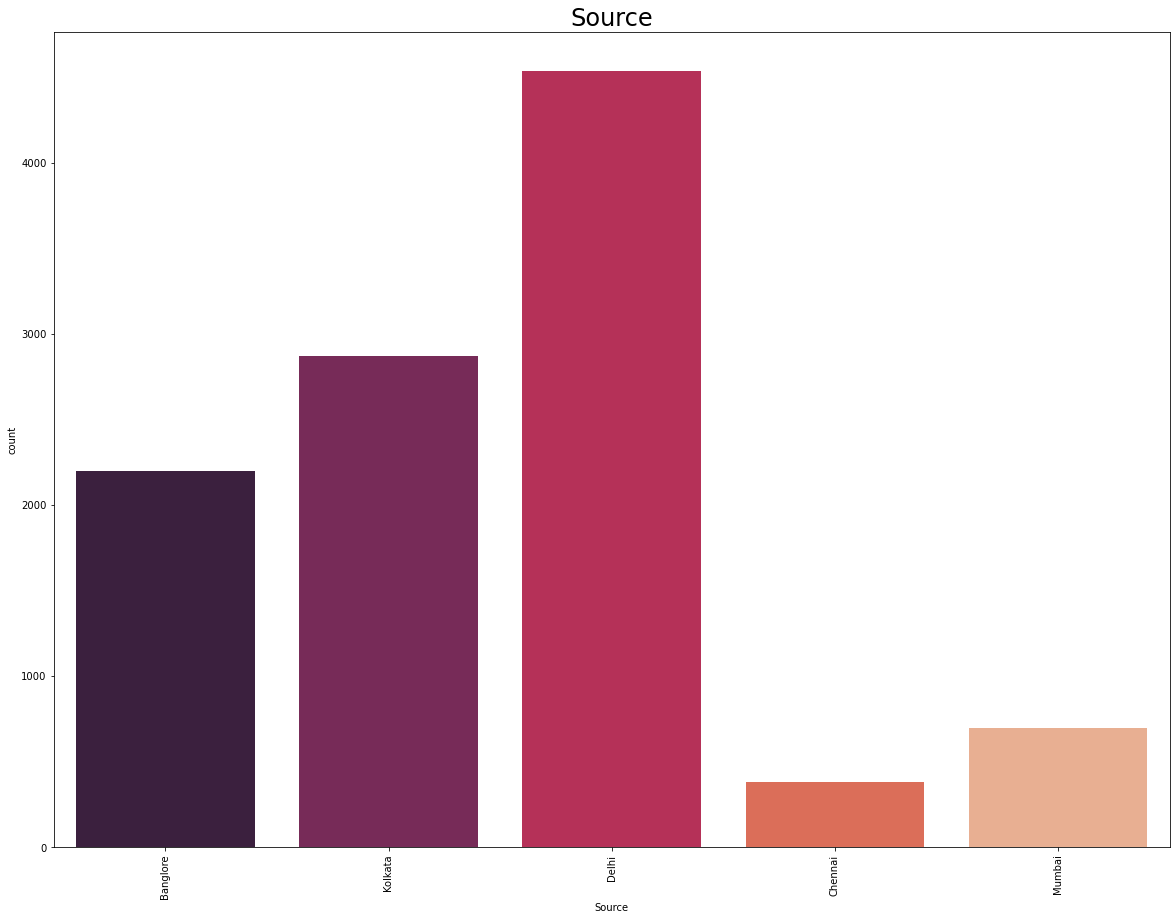

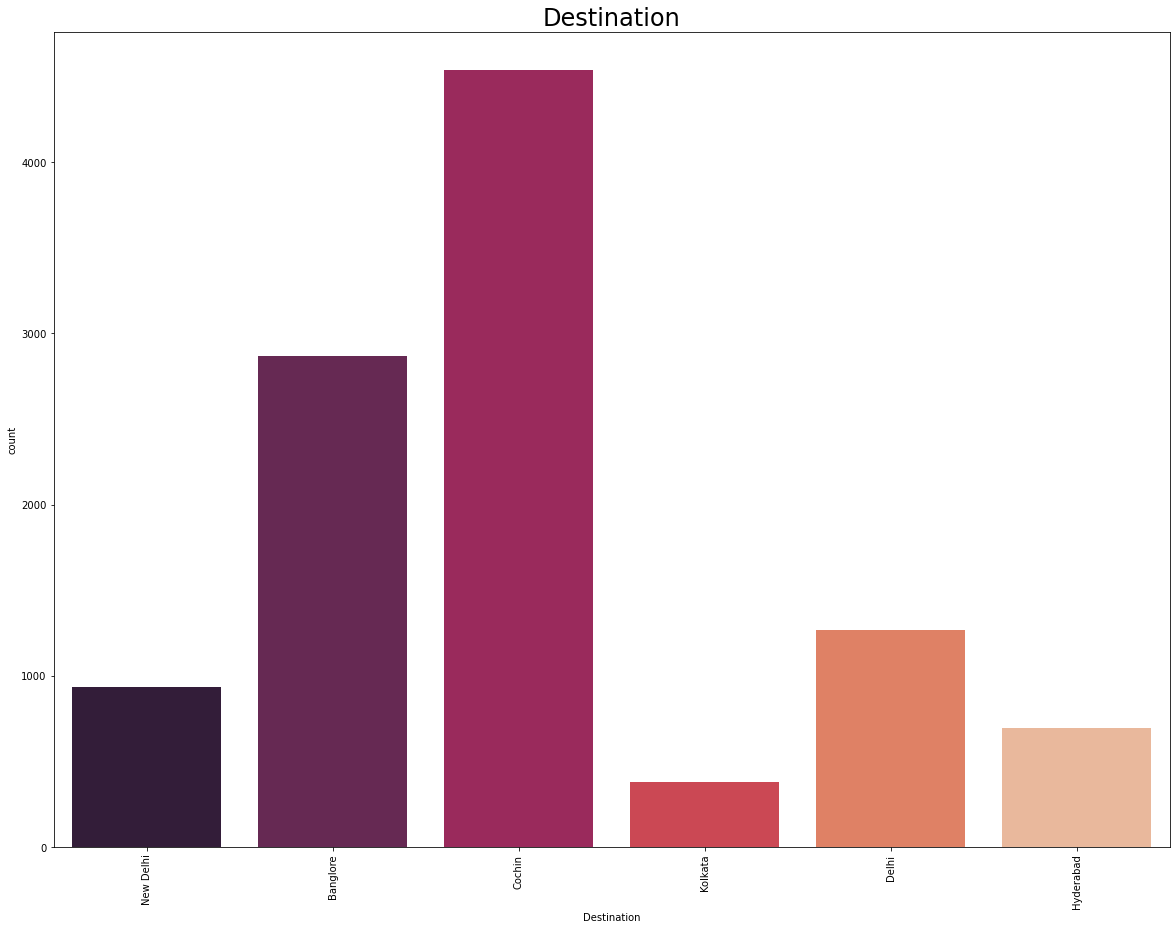

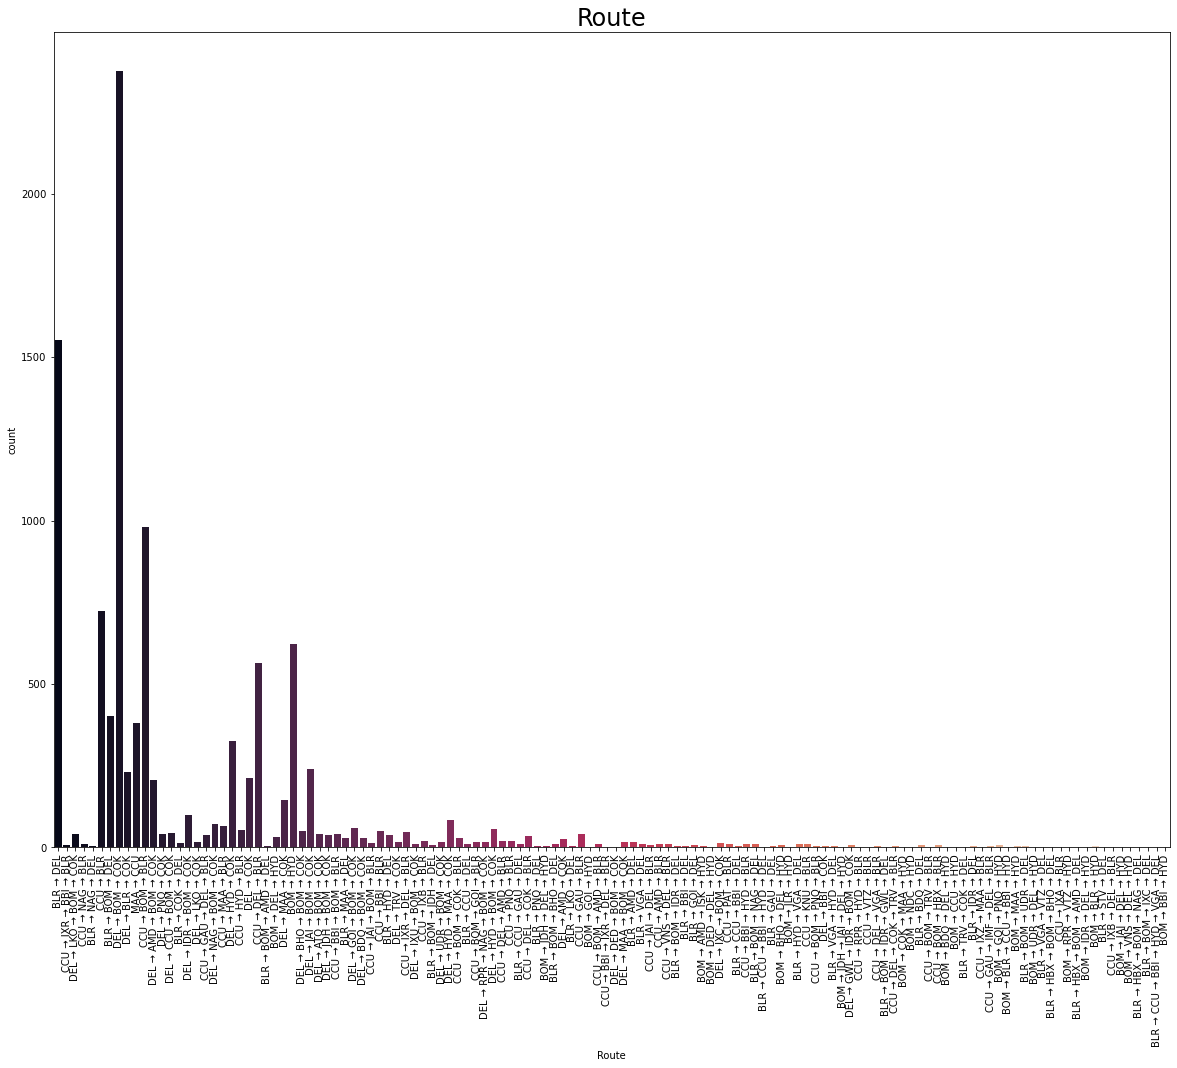

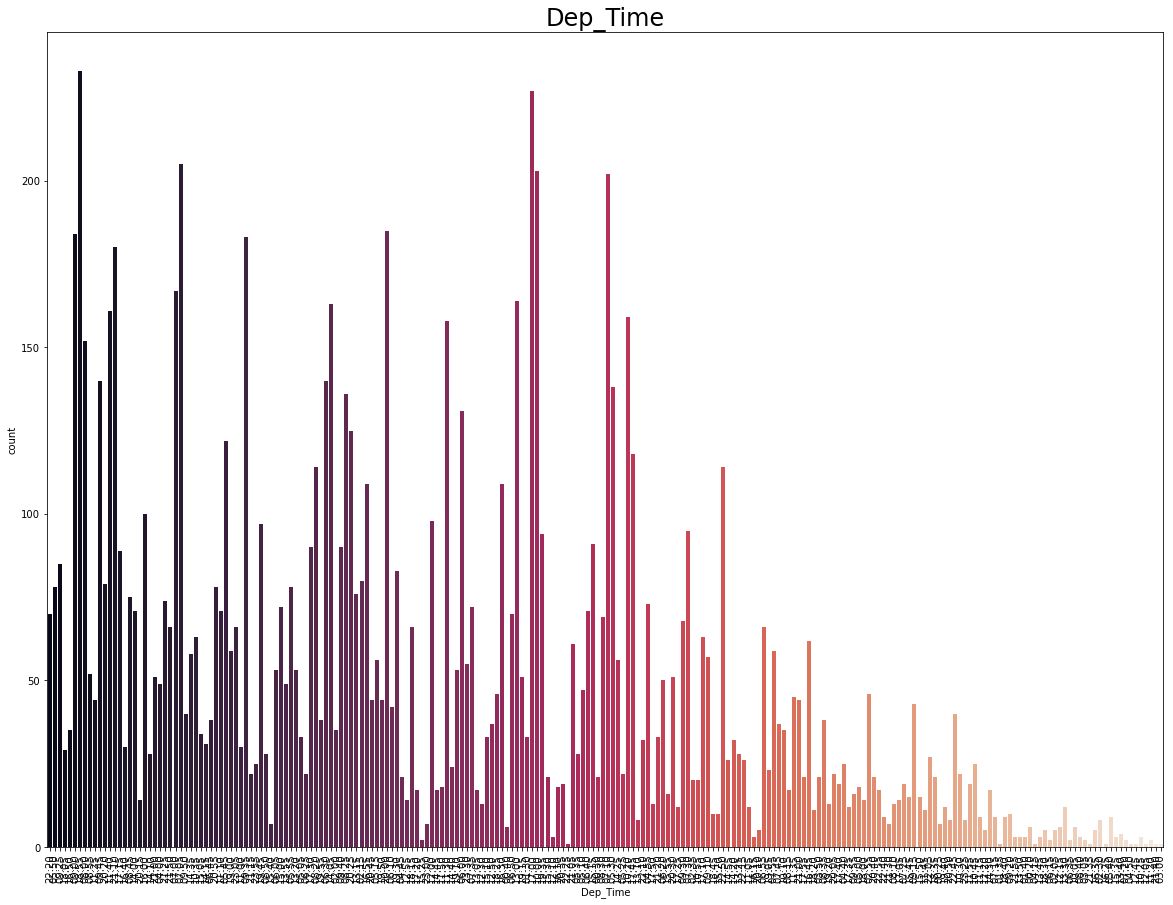

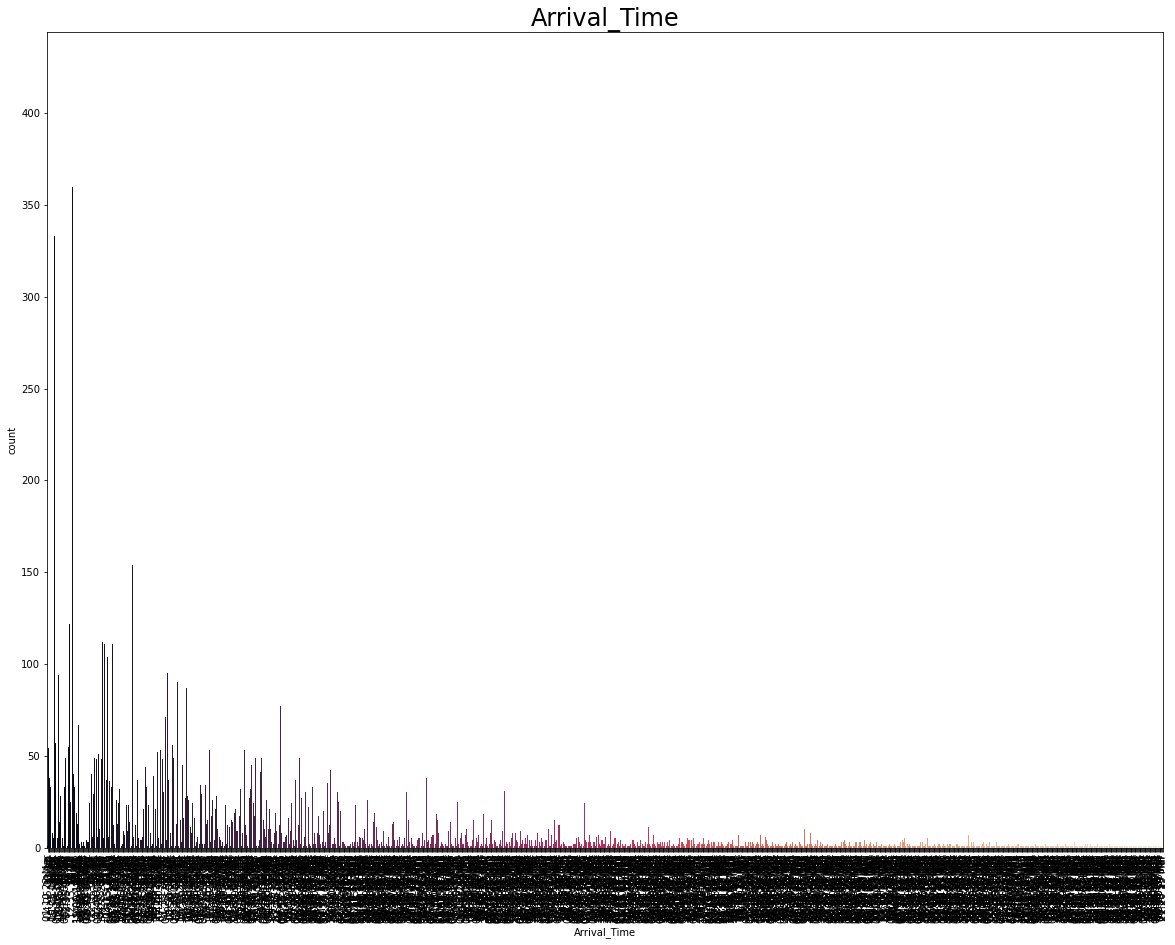

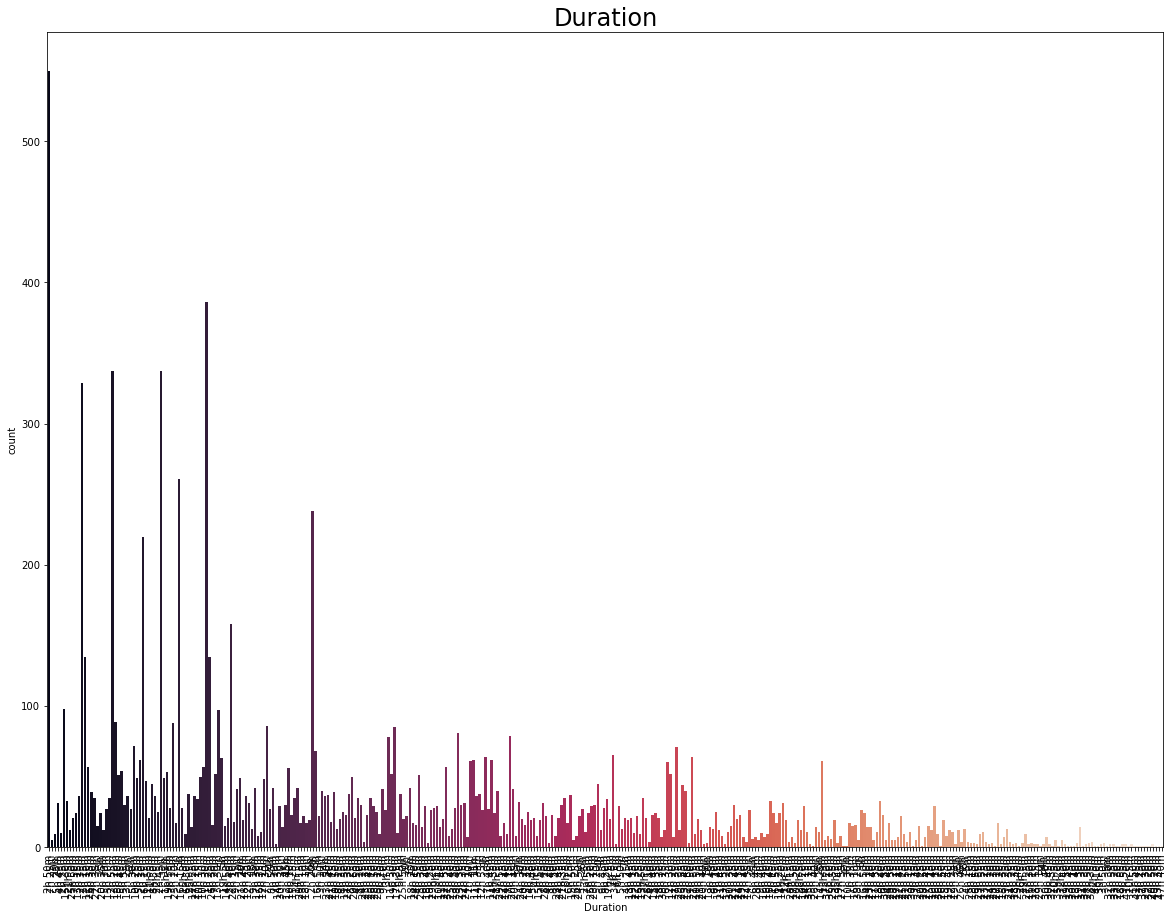

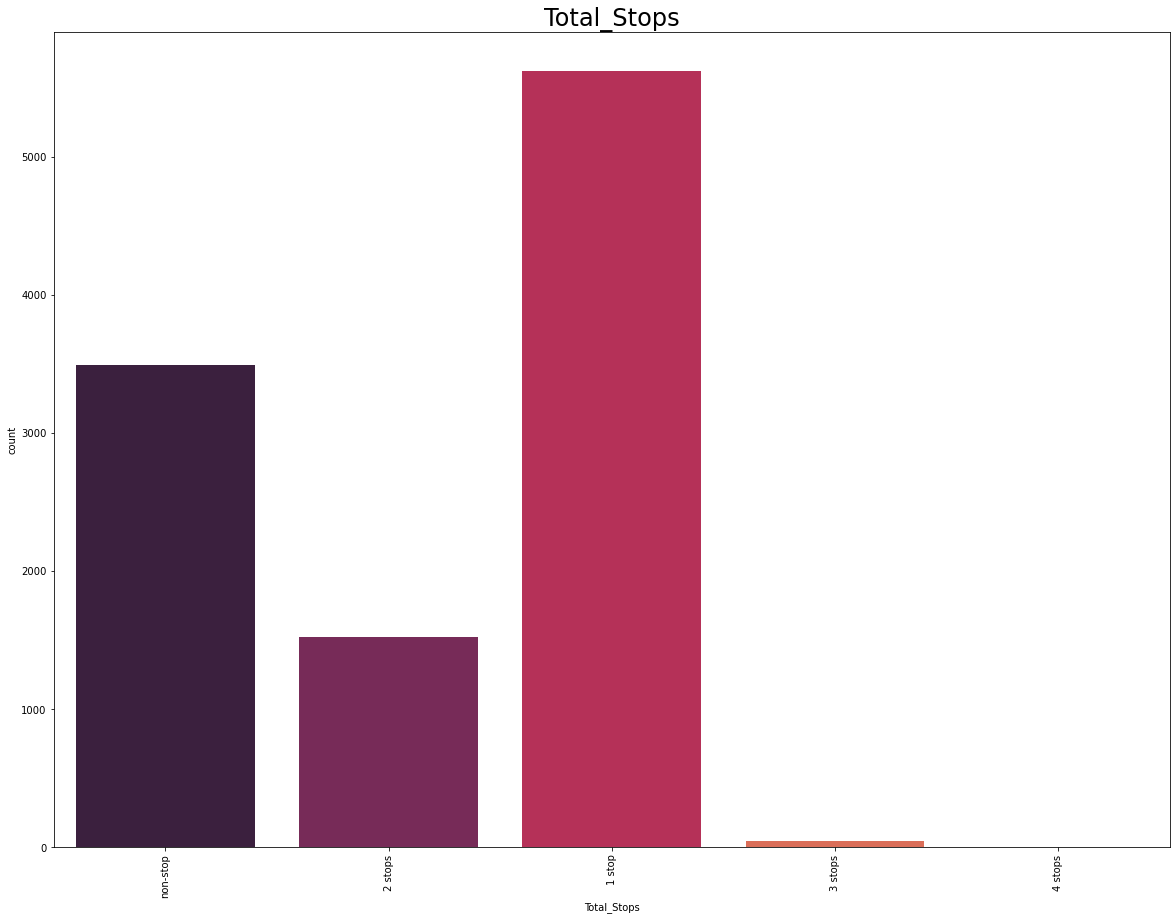

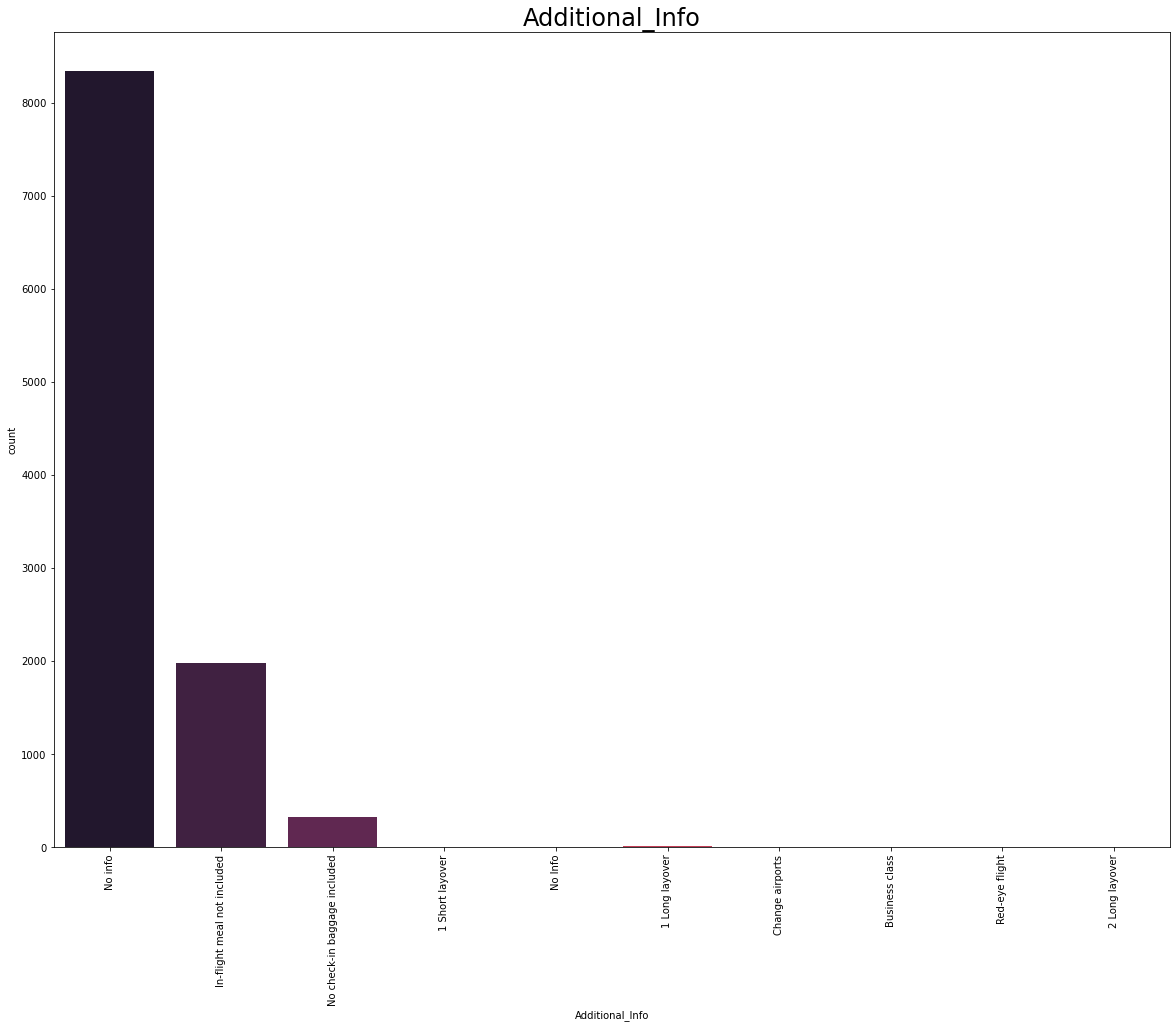

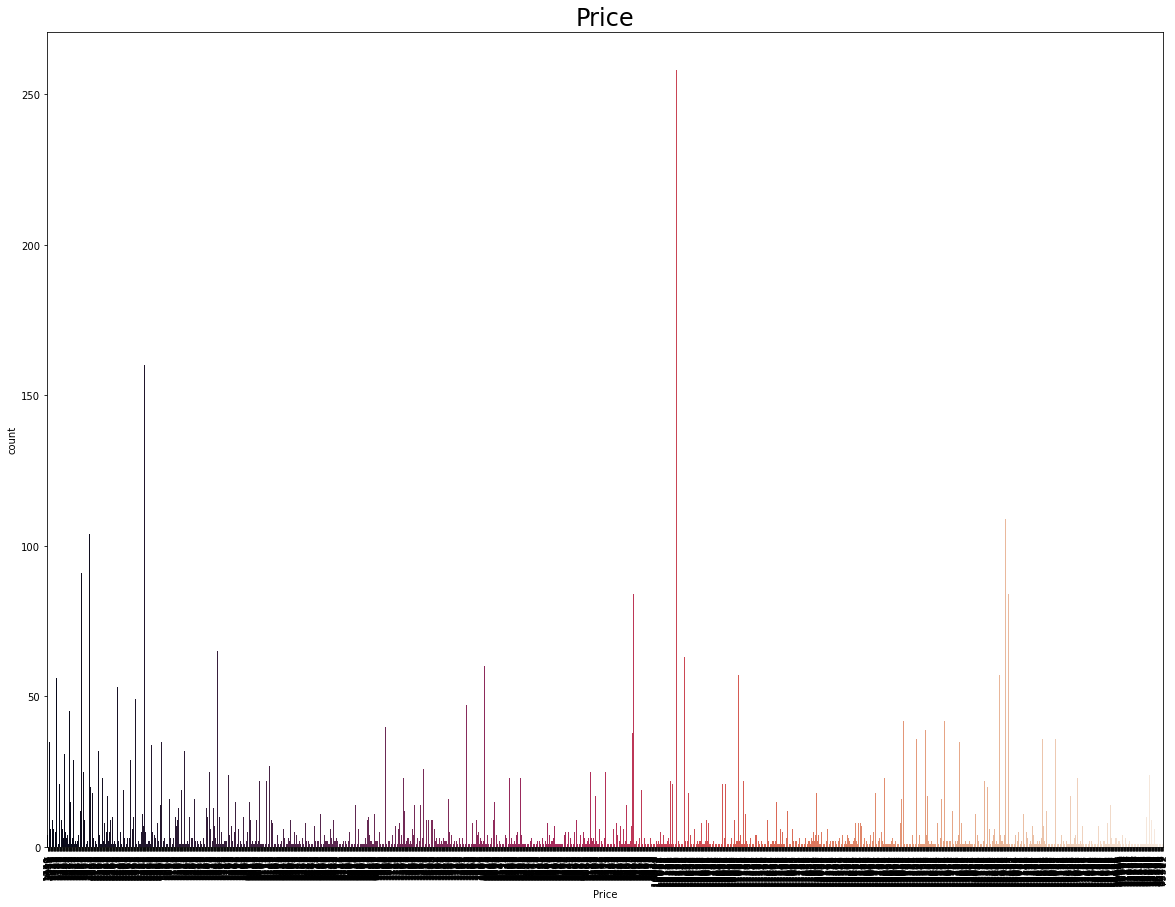

In [7]:
for i in flight.columns:
    fig_size = (20,15)
    fig, ax = plt.subplots(figsize = fig_size)
    sns.countplot(data=flight, x=i, palette="rocket")
    plt.xticks(rotation=90)
    plt.title(i, fontsize = 24)

In [8]:
for i in flight.columns:
    print(flight[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


### Observtions:

1. Airline : Jetairways have the highest count of 3849 record
2. Date_of_Journey: customers have travelled a lot in the dates 18/05/2019, 6/06/209,21/05/2019, 9/06/2019, 12/05/2019, 9/06/2019,9/05/2019.
3. Source: Most of the customers have travelled from delhi
4. Destination: Most of the customers have travelled to cochin
5. Route: DEL → BOM → COK delhi bombay cochin is the most travelled route
6. Dep_Time: the hightes frequestly travelled deperature time is 18:55
7. Arrival_Time: the hightes frequestly travelled arrival time is 19:00
8. Duration: The hightes frequestly travelled duration 2h 50m 
9. Total_Stops: More than 5000 records have 1 stops
10. Additional_Info : Most of the records of additional information are not available 

In [9]:
#check column names 
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### Replace ? with null

In [10]:
flight = flight.replace("?", np.nan)

In [11]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

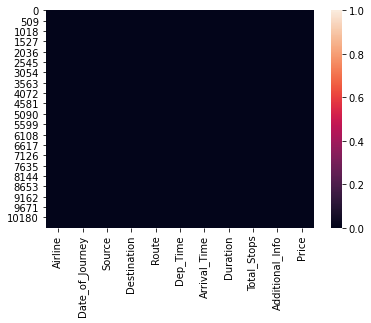

In [12]:
sns.heatmap(flight.isnull())

- only 2 null values and hence we drop the column

In [13]:
flight.dropna(subset=["Route", "Total_Stops"], inplace=True)

In [14]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- No null values

### Handlne time and date records

In [15]:
flight["Date_of_Journey"]  = pd.to_datetime(flight["Date_of_Journey"])

In [16]:
flight["Date_of_Journey"] .dtypes

dtype('<M8[ns]')

In [17]:

flight["Date_of_Journey"]

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

##### converted to date

In [18]:
flight.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
flight["Dep_Time"] = pd.to_timedelta(flight["Dep_Time"]+":00")

In [20]:
flight.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time           timedelta64[ns]
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
dtype: object

In [21]:
Arrival_Time = flight[["Arrival_Time"]].copy()

In [22]:
flight["Arrival_Time"] = flight["Arrival_Time"].str.split(" ", n=1, expand=True)

In [23]:
flight.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302


In [24]:
flight["Arrival_Time"] = pd.to_timedelta(flight["Arrival_Time"]+":00")

In [25]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302


In [26]:
#flight["Duration"].replace(to_replace=r'h', value="", regex=True, inplace=True)

In [27]:
#flight["Duration"].replace(to_replace=r'm', value="", regex=True, inplace=True)

In [28]:
#flight["Duration"]

In [29]:
flight["Duration"] = pd.to_timedelta(flight["Duration"])

In [30]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,02:50:00,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,07:25:00,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19:00:00,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,05:25:00,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,04:45:00,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,02:30:00,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,02:35:00,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,03:00:00,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,02:40:00,non-stop,No info,12648


In [31]:
flight["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [32]:
flight.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time           timedelta64[ns]
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                 object
Additional_Info             object
Price                        int64
dtype: object

##### the date and time records are handled 

### Handling categorical variables

In [33]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [34]:
obj = []
for x in flight.columns:
    if flight[x].dtypes == "object":
        obj.append(x)

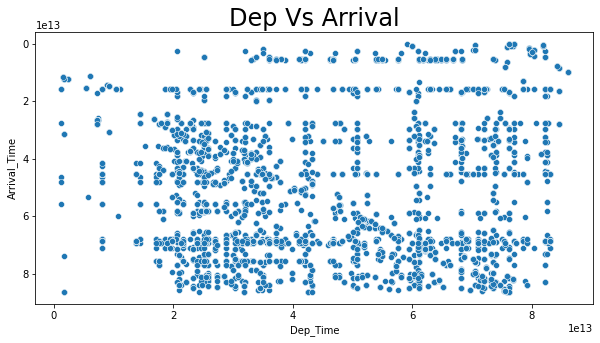

In [35]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Dep Vs Arrival", fontsize=24)
sns.scatterplot(x="Dep_Time", y= "Arrival_Time", data=flight)   

### Observation:
- No relationship between deptime and arrival time

In [36]:
flight.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time           timedelta64[ns]
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                 object
Additional_Info             object
Price                        int64
dtype: object

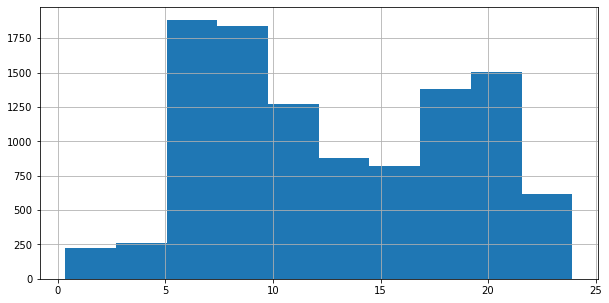

In [37]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
flight["Dep_Time"].dt.seconds.apply(lambda x:x/3600).hist()

- The distribution of the dep time is not normalize

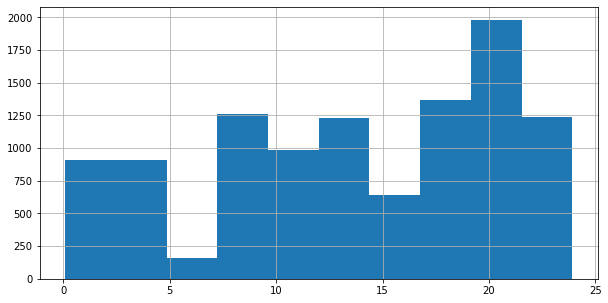

In [38]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
flight["Arrival_Time"].dt.seconds.apply(lambda x:x/3600).hist()

- The distribution is not normalized

In [39]:
flight["Price"].max()

79512

In [40]:
flight["Price"].min()

1759

In [41]:
flight["Price"].median()

8372.0

In [42]:
flight["Date_of_Journey"].value_counts()

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-09-06    495
2019-12-06    493
2019-09-05    484
2019-03-21    423
2019-05-15    405
2019-06-03    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-01-06    342
2019-03-06    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-09-03    302
2019-03-27    299
2019-05-24    286
2019-06-05    281
2019-01-05    277
2019-12-05    259
2019-01-04    257
2019-01-03    199
2019-03-15    162
2019-03-18    156
2019-12-03    142
2019-09-04    125
2019-03-04    110
2019-06-21    109
2019-06-18    105
2019-06-04    100
2019-04-27     94
2019-04-24     92
2019-03-05     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-12-04     63
Name: Date_of_Journey, dtype: int64

In [43]:
df = flight.set_index("Date_of_Journey")

In [44]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_of_Journey,,,,,,,,,,
2019-03-24,IndiGo,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,02:50:00,non-stop,No info,3897
2019-01-05,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,07:25:00,2 stops,No info,7662
2019-09-06,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19:00:00,2 stops,No info,13882
2019-12-05,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,05:25:00,1 stop,No info,6218
2019-01-03,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,04:45:00,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
2019-09-04,Air Asia,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,02:30:00,non-stop,No info,4107
2019-04-27,Air India,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,02:35:00,non-stop,No info,4145
2019-04-27,Jet Airways,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,03:00:00,non-stop,No info,7229


In [45]:
date = ['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019' ,'01/03/2019',
 '24/06/2019' ,'12/03/2019' ,'27/05/2019' ,'1/06/2019' ,'18/04/2019',
 '9/05/2019', '24/04/2019' ,'3/03/2019' ,'15/04/2019' ,'12/06/2019',
 '6/03/2019' ,'21/03/2019' ,'3/04/2019' ,'6/05/2019' ,'15/05/2019',
 '18/06/2019' ,'15/06/2019' ,'6/04/2019' ,'18/05/2019', '27/06/2019',
 '21/05/2019' ,'06/03/2019' ,'3/06/2019' ,'15/03/2019' ,'3/05/2019',
 '9/03/2019' ,'6/06/2019' ,'24/05/2019' ,'09/03/2019' ,'1/04/2019',
 '21/04/2019' ,'21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
 '9/04/2019' ,'1/03/2019', '03/03/2019', '27/04/2019']

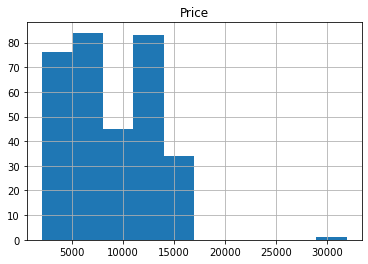

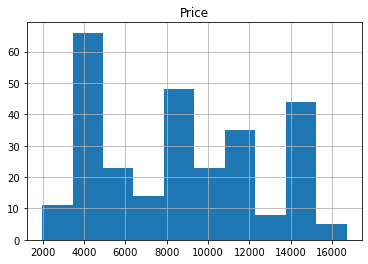

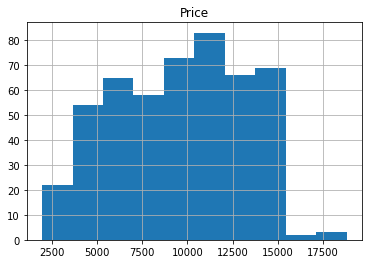

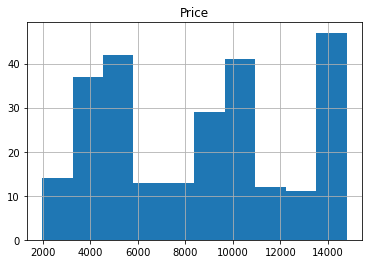

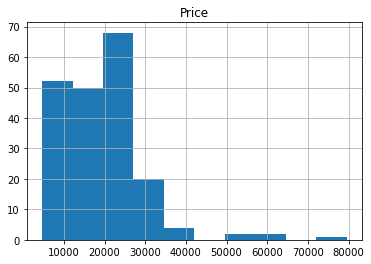

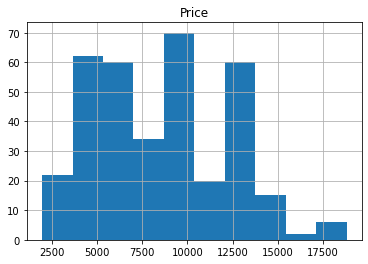

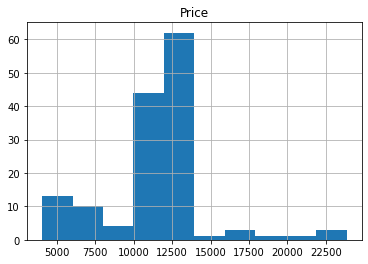

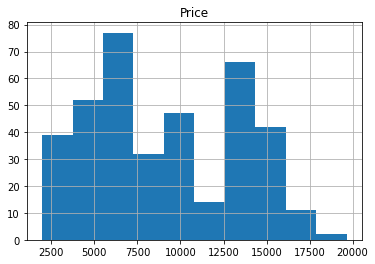

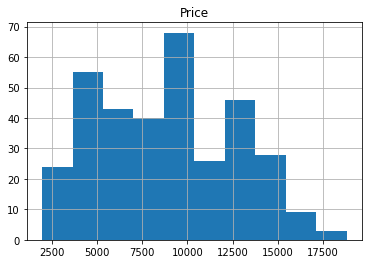

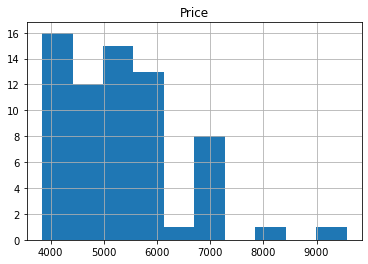

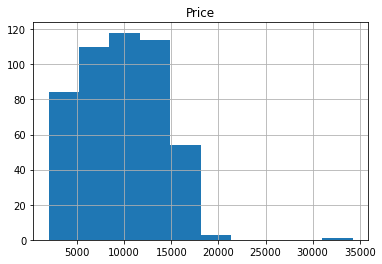

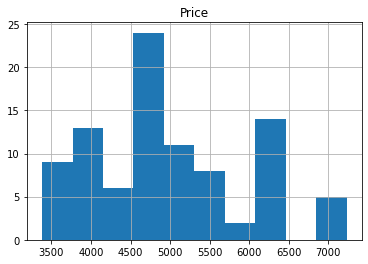

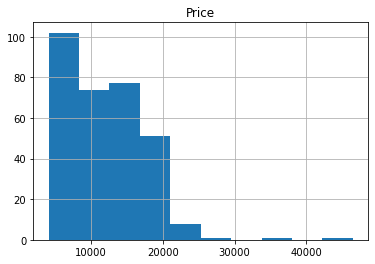

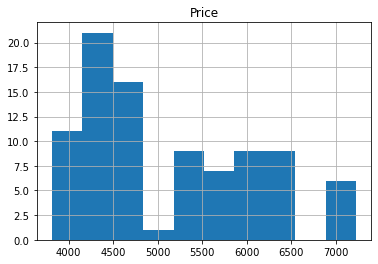

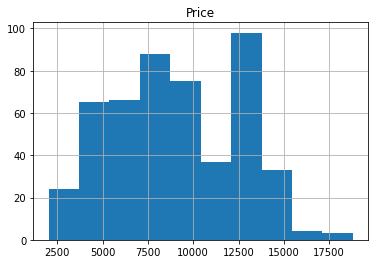

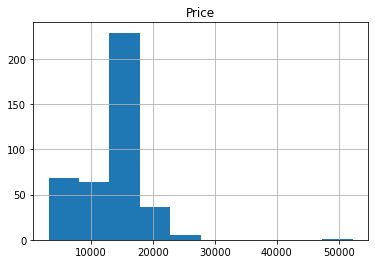

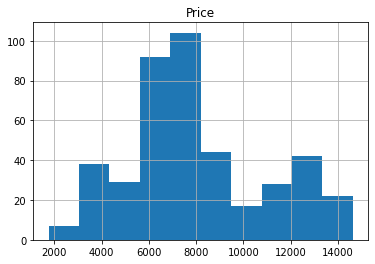

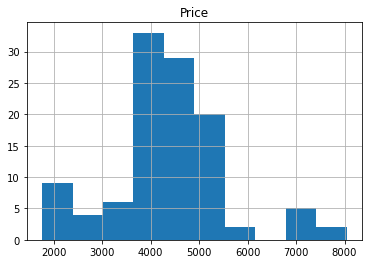

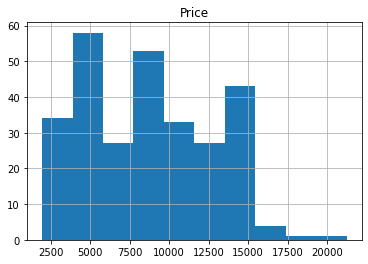

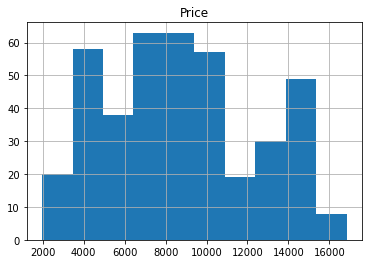

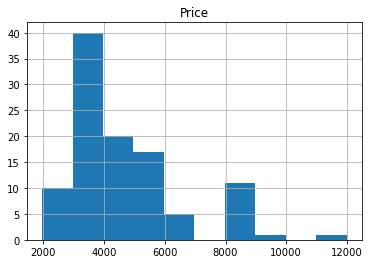

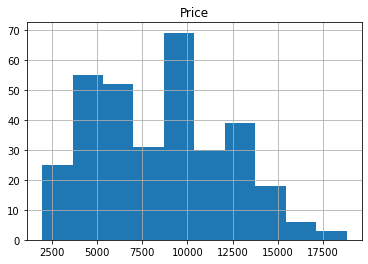

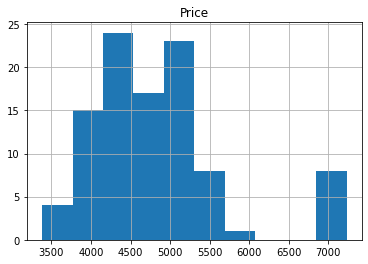

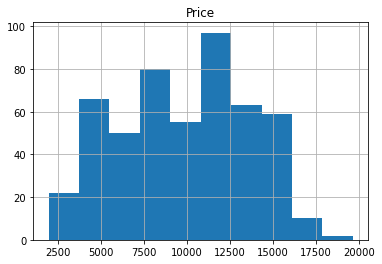

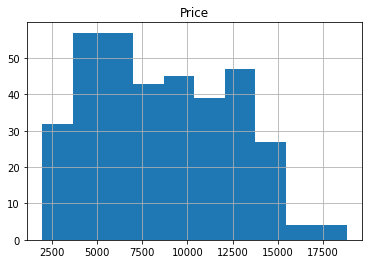

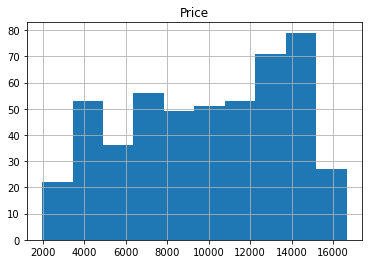

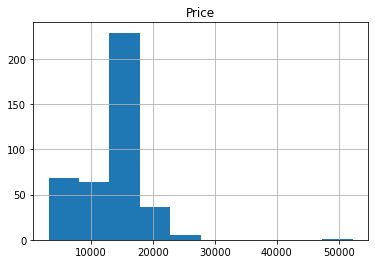

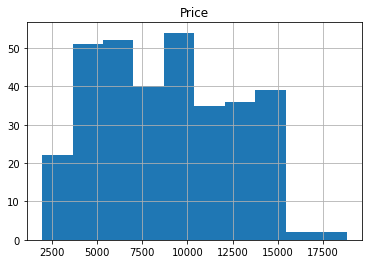

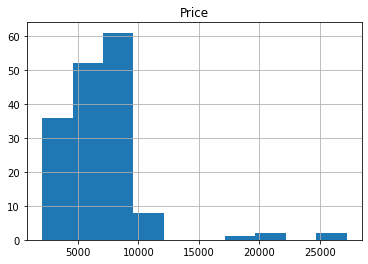

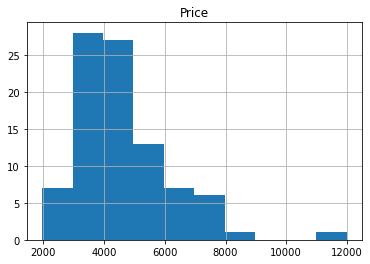

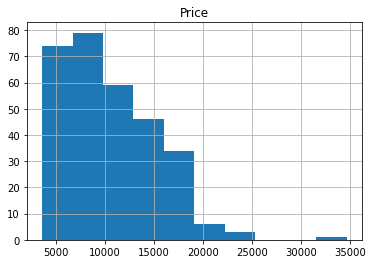

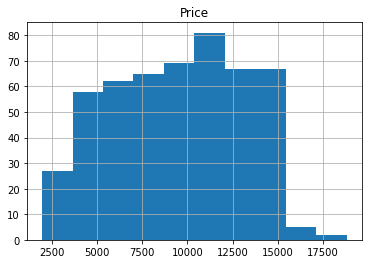

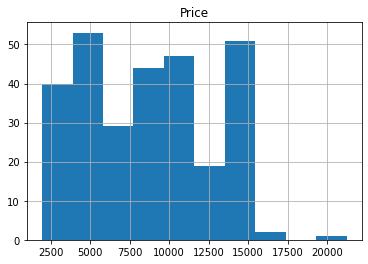

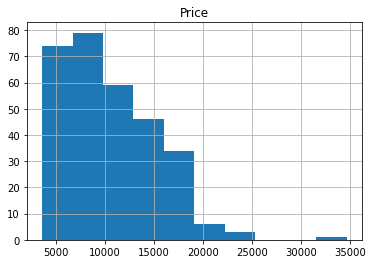

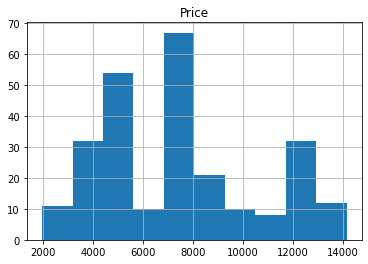

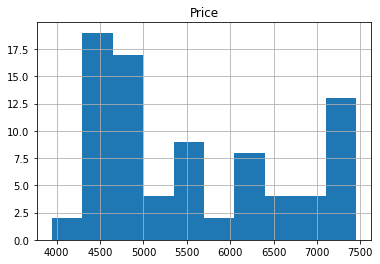

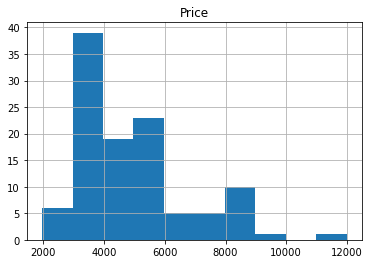

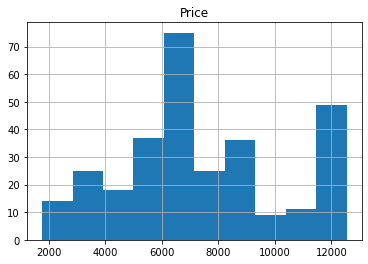

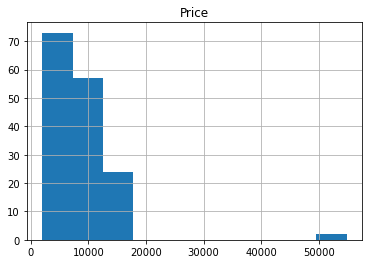

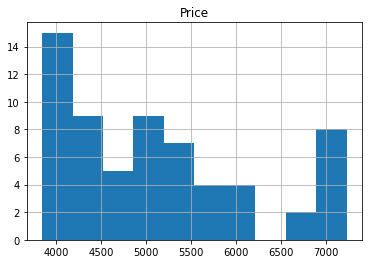

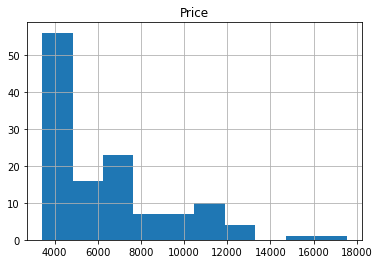

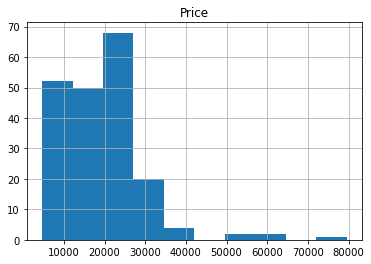

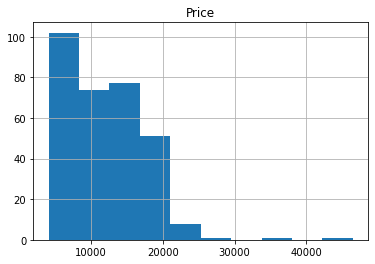

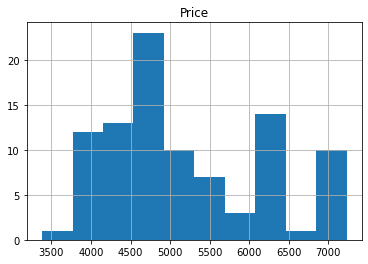

In [46]:
# for date 2019-03-24
for x in date:
    df.loc[x].hist()
   
    

### Observations:
- '24/03/2019' : Range from 5000 -15500 and few tickets were sold for 30,000
- '1/05/2019'  : range from 2000 - 16000 with tickets sold for 4000 to be the highest
- '9/06/2019'  : Range from 2500 - 17500 with tickets sold for 15000 to be the highest
- '12/05/2019' : Range from 2000 - 14000 with tickets sold for 14000 to be the highest
- '01/03/2019' : Range from 10000 - 35000 with tickets sold for 25000 to be the highest
- '24/06/2019' : Range from 2500 - 17500 with tickets sold for 9000-10000 to be the highest 
- '12/03/2019' : Range from 5000 - 22500 with tickets sold for 12000-12500 to be the highest 
- '27/05/2019' : Range from 2500 - 19000 with tickets sold for 6000-7000 to be the highest
- '1/06/2019'  : Range from 2500 - 17500 with tickets sold for 9000-10000 to be the highest
- '18/04/2019' : Range from 4000 - 9000 with tickets sold for 4000-4500 to be the highest
- '9/05/2019'  : Range from 4500 - 20000 with tickets sold for 10000 to be the highest
- '24/04/2019' : Range from 3500 - 6000 with tickets sold for 4500-4900 to be the highest
- '3/03/2019'  : Range from 10000 - 30000 with tickets sold for 10500-19000 to be the highest
- '15/04/2019' : Range from 4000 - 6500 with tickets sold for 4100-4500 to be the highest
- '12/06/2019' : Range from 2500 - 7800 with tickets sold for 12500-14000 to be the highest
- '6/03/2019'  : Range from 5000 - 20500 with tickets sold for 18000-19000 to be the highest
- '21/03/2019' : Range from 1500 - 14000 with tickets sold for 7000-8100 to be the highest
- '3/04/2019'  : Range from 1500 - 6000 with tickets sold for 3500-4500 to be the highest
- '6/05/2019'  : Range from 2000 - 20000 with tickets sold for 3500-5000 to be the highest
- '15/05/2019' : Range from 2000 - 16000 with tickets sold for 6200-8500 to be the highest
- '18/06/2019' : Range from 2000 - 6000 with tickets sold for 2500-4000 to be the highest
- '15/06/2019' : Range from 2300 - 17800 with tickets sold for 8000-10100 to be the highest
- '6/04/2019'  : Range from 2800 - 6100 with tickets sold for 4000-4200 to be the highest
- '18/05/2019' : Range from 2500 - 18000 with tickets sold for 11000-12500 to be the highest
- '27/06/2019' : Range from 2300 - 17800 with tickets sold for 2800-7800 to be the highest
- '21/05/2019' : Range from 2000 - 16300 with tickets sold for 13000-14500 to be the highest
- '06/03/2019' : Range from 13500 - 19000 with tickets sold for 16500-17000 to be the highest
- '3/06/2019'  : Range from 2500 - 17800 with tickets sold for 8000-10100 to be the highest
- '15/03/2019' : Range from 3000 - 13000 with tickets sold for 7000-8000 to be the highest
- '3/05/2019'  : Range from 2000 - 8500 with tickets sold for 2500-4500 to be the highest
- '9/03/2019'  : Range from 4500 - 25000 with tickets sold for 13000-18000 to be the highest
- '6/06/2019'  : Range from 2300 - 17800 with tickets sold for 11000-11500 to be the highest
- '24/05/2019' : Range from 2500 - 17200 with tickets sold for 4500-5200 to be the highest
- '09/03/2019' : Range from 4500 - 12000 with tickets sold for 6000-7700 to be the highest
- '1/04/2019'  : Range from 2000 - 14100 with tickets sold for 7000-8000 to be the highest
- '21/04/2019' : Range from 3500 - 72000 with tickets sold for 4300-4900 to be the highest
- '21/06/2019' : Range from 2000 - 10000 with tickets sold for 2500-4000 to be the highest
- '27/03/2019' : Range from 1800 - 12500 with tickets sold for 6000-6500 to be the highest
- '18/03/2019' : Range from 5000 - 18000 with tickets sold for 5000-8000 to be the highest
- '12/04/2019' : Range from 3500 - 6500 with tickets sold for 3500-4200 to be the highest
- '9/04/2019'  : Range from 4000 - 13000 with tickets sold for 3500-5000 to be the highest
- '1/03/2019'  : Range from 4900 - 22000 with tickets sold for 4900-7000 to be the highest
- '03/03/2019' : Range from 6100 - 14100 with tickets sold for 6000-7500 to be the highest
- '27/04/2019' : Range from 3200 - 7500 with tickets sold for 4500-4700 to be the highest

## Label Encoding 

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in obj:
    flight[x]=le.fit_transform(flight[x])

#### Convert date time to ordinal

In [48]:
#converting date to ordinal type for prediction
import datetime as dt
flight["Date_of_Journey"] = flight["Date_of_Journey"].map(dt.datetime.toordinal)


In [49]:
flight.dtypes

Airline                      int32
Date_of_Journey              int64
Source                       int32
Destination                  int32
Route                        int32
Dep_Time           timedelta64[ns]
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                  int32
Additional_Info              int32
Price                        int64
dtype: object

In [50]:
flight["Dep_Time"] 

0       22:20:00
1       05:50:00
2       09:25:00
3       18:05:00
4       16:50:00
          ...   
10678   19:55:00
10679   20:45:00
10680   08:20:00
10681   11:30:00
10682   10:55:00
Name: Dep_Time, Length: 10682, dtype: timedelta64[ns]

In [51]:
flight["Dep_Time"]=  pd.to_numeric(flight["Dep_Time"], downcast='integer')

In [52]:
flight.dtypes

Airline                      int32
Date_of_Journey              int64
Source                       int32
Destination                  int32
Route                        int32
Dep_Time                     int64
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                  int32
Additional_Info              int32
Price                        int64
dtype: object

In [53]:
flight["Arrival_Time"]=  pd.to_numeric(flight["Arrival_Time"], downcast='integer')
flight["Duration"]=  pd.to_numeric(flight["Duration"], downcast='integer')

In [54]:
flight.dtypes

Airline            int32
Date_of_Journey    int64
Source             int32
Destination        int32
Route              int32
Dep_Time           int64
Arrival_Time       int64
Duration           int64
Total_Stops        int32
Additional_Info    int32
Price              int64
dtype: object

In [55]:
flight.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,1.068200e+04,1.068200e+04,1.068200e+04,10682.000000,10682.000000,10682.000000
mean,3.966205,737208.508425,1.952256,1.436154,74.820165,4.643220e+13,4.953850e+13,3.858123e+13,1.458248,7.392998,9087.214567
std,2.352090,89.117803,1.177276,1.474845,36.729039,2.069852e+13,2.456016e+13,3.046981e+13,1.806320,1.214254,4611.548810
min,0.000000,737062.000000,0.000000,0.000000,0.000000,1.200000e+12,3.000000e+11,3.000000e+11,0.000000,0.000000,1759.000000
25%,3.000000,737142.000000,2.000000,0.000000,48.000000,2.880000e+13,3.150000e+13,1.020000e+13,0.000000,8.000000,5277.000000
50%,4.000000,737203.000000,2.000000,1.000000,73.000000,4.260000e+13,5.070000e+13,3.120000e+13,0.000000,8.000000,8372.000000
75%,4.000000,737237.000000,3.000000,2.000000,104.000000,6.510000e+13,6.930000e+13,5.580000e+13,4.000000,8.000000,12373.000000
max,11.000000,737399.000000,4.000000,5.000000,127.000000,8.610000e+13,8.610000e+13,1.716000e+14,4.000000,9.000000,79512.000000


### Observation:
 -  some columns have huge difference between mean and std but, considering them to be categorical it can be ignored
 - Min -max range has big difference - apply scalling

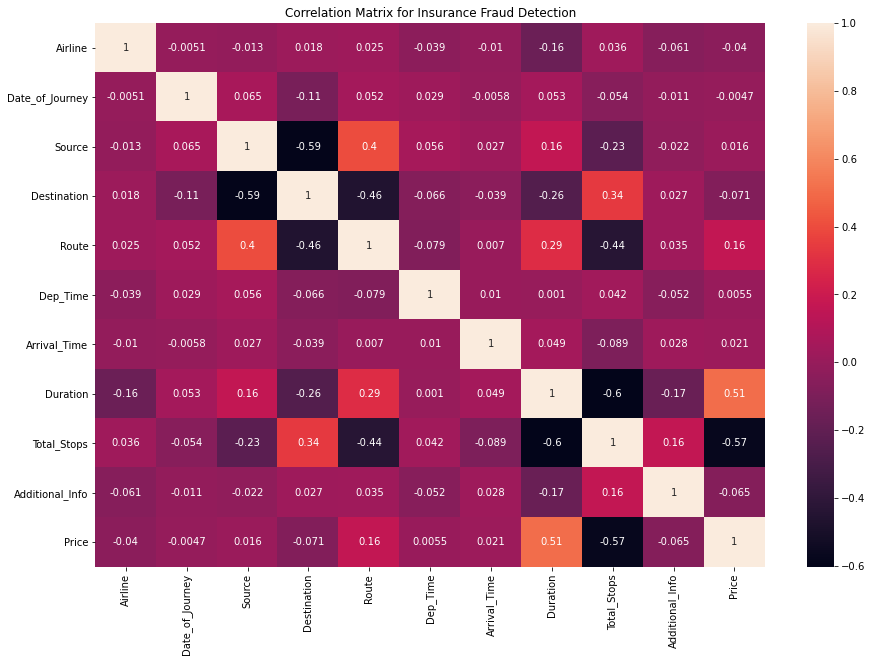

In [56]:
#correlation matrix to find correlation amoung the columns
correlation = flight.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix for Insurance Fraud Detection")
plt.show()

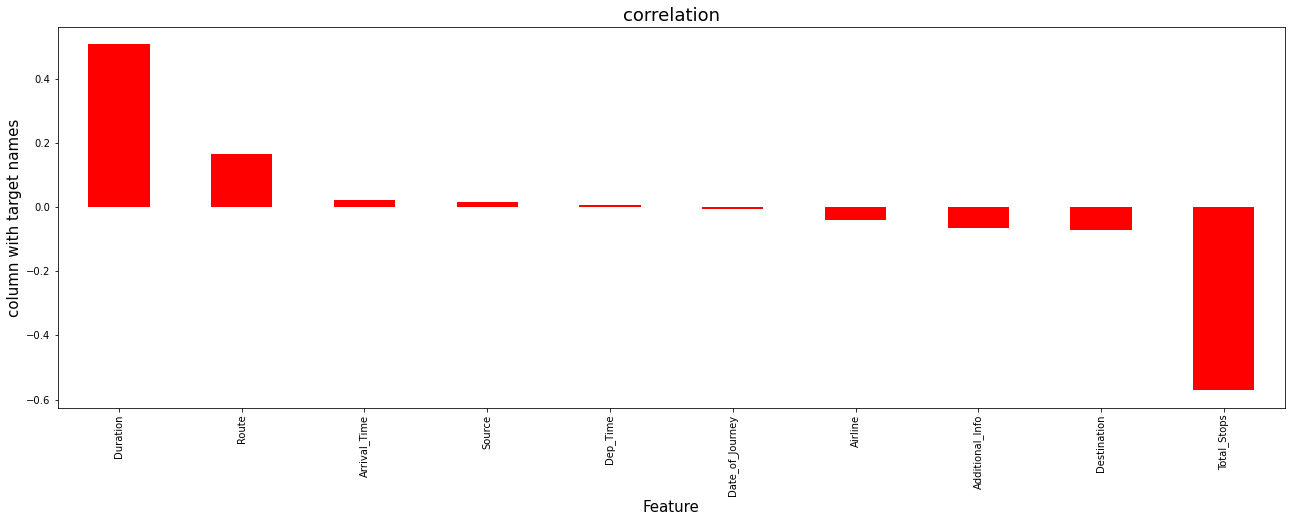

In [57]:
plt.figure(figsize=(22,7))
flight.corr()["Price"].sort_values(ascending = False).drop(["Price"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

### Correlation:
- All independent variables are either positively or negatively correlated with the target variable

## Check for null values

In [58]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Spliting independent and dependent variables

In [59]:
x = flight.drop("Price", axis=1)
y = flight["Price"]

In [60]:
print(x.shape, y.shape)

(10682, 10) (10682,)


## Check for skewness in data and removal

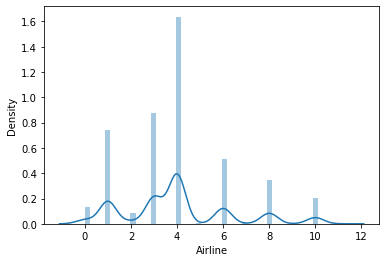

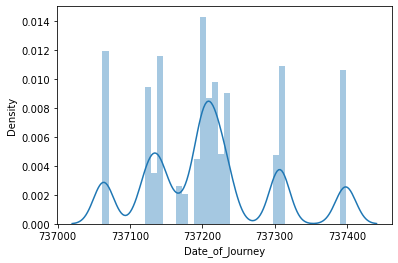

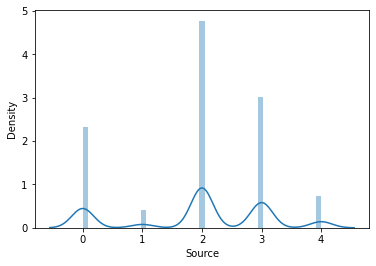

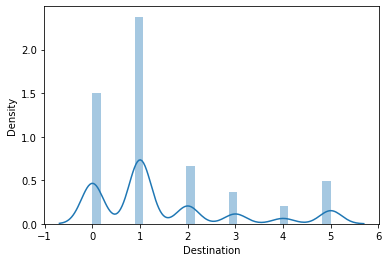

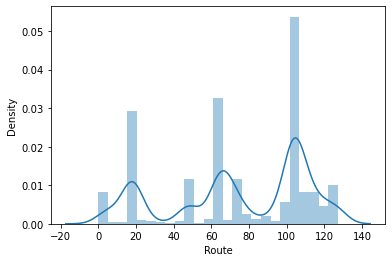

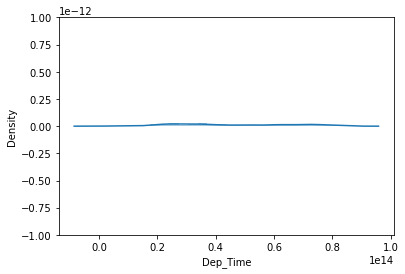

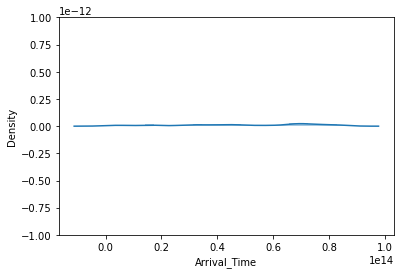

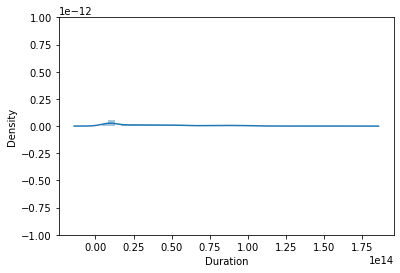

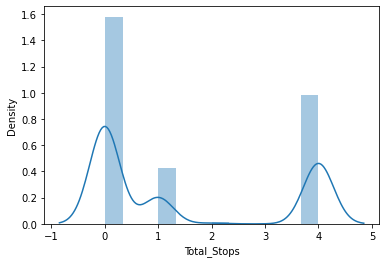

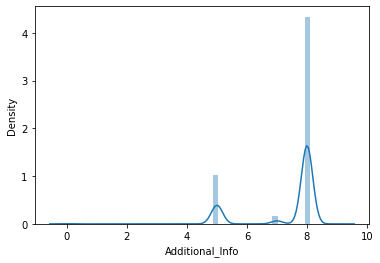

In [61]:
for i in x.columns:
    sns.distplot(x[i], kde=True)
    plt.show()

- All the columns are categorical no skewness

## Check for outliers and removal

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text major ticklabel objects>)

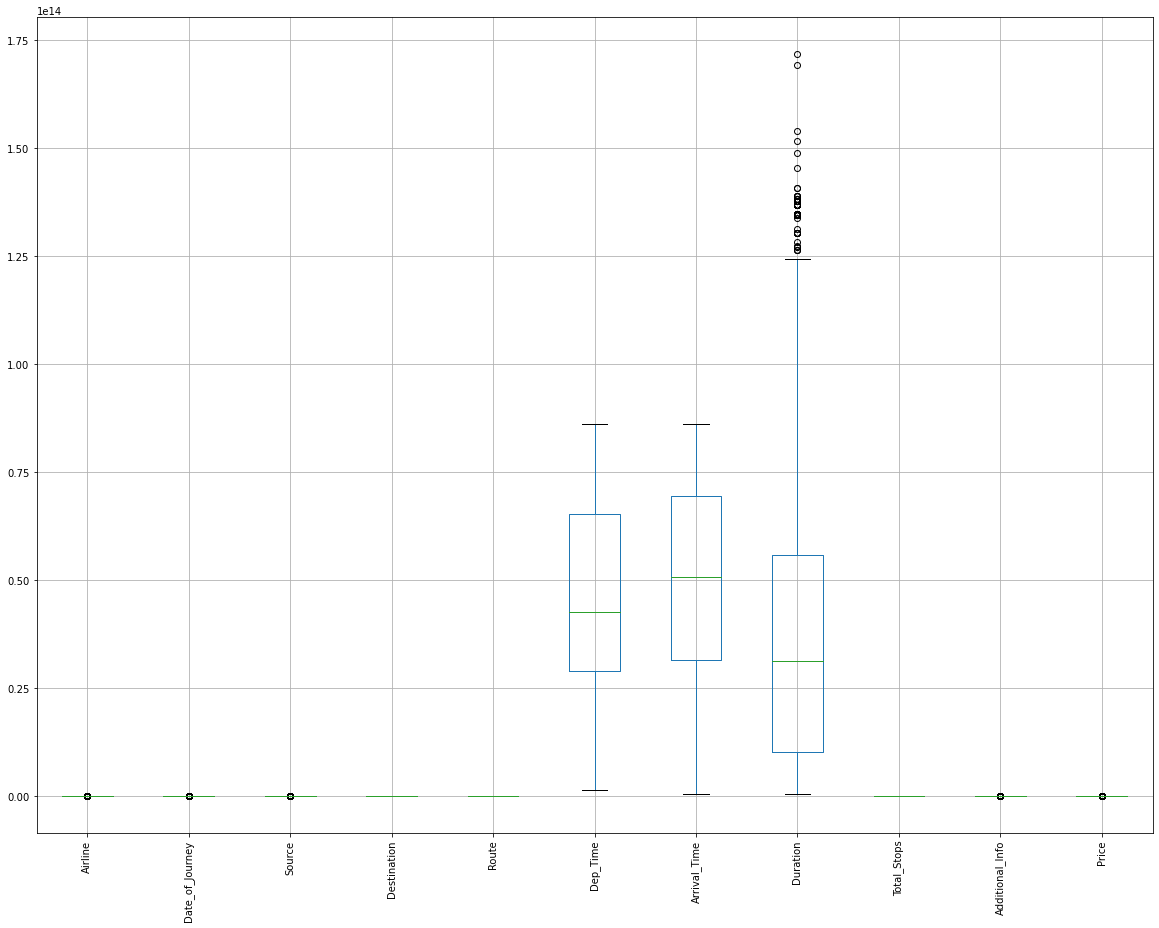

In [62]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
flight.boxplot()
plt.xticks(rotation=90)

### Using z-score

In [63]:
from scipy.stats import zscore
z= np.abs(zscore(x))

In [64]:
threshold = 3
print(np.where(z>3))

(array([  226,   553,   785,   966,   969,  1043,  1067,  1113,  1346,
        1442,  1496,  1551,  1657,  1791,  1804,  2079,  2172,  2405,
        2481,  2495,  2553,  2556,  2641,  2654,  2718,  2924,  3032,
        3111,  3457,  3700,  3788,  3790,  3815,  3966,  4047,  4118,
        4463,  4521,  4655,  5013,  5372,  5516,  5628,  5701,  5711,
        5782,  5933,  5953,  6024,  6059,  6085,  6321,  6336,  6476,
        6576,  6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,
        7724,  7876,  7906,  8127,  8153,  8360,  8409,  8412,  8601,
        8621,  8698,  8729,  8957,  9019,  9246,  9395,  9483,  9550,
        9656,  9672,  9702,  9847, 10019, 10325, 10363, 10455, 10510,
       10638], dtype=int64), array([7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 9, 7, 9,
       7, 7, 7, 9, 9, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 7, 9, 7,
       7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7,

In [65]:
x = x[(z<3).all(axis=1)]
y = y[(z<3).all(axis=1)]

In [66]:
print(x.shape)
print(y.shape)

(10591, 10)
(10591,)


In [67]:
loss = (10682-10591)/10682*100
print(loss)

0.8519003931847969


- Acceptable percentage

#### Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)

##### scaled

# finding the best random state

In [69]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.4761537194676281  on Random State  39


# Test/Train split

In [70]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 39)

In [71]:
# printing the shape of train test split data
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(2119, 10)
(2119,)
(8472, 10)
(8472,)


# Finding the best Algorithm

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [73]:
model =[RandomForestRegressor(),DecisionTreeRegressor(), AdaBoostRegressor()]

In [74]:
model

[RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostRegressor()]

In [75]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
    print('error')
    print("Mean absolute error: ", mean_absolute_error(y_test,predm))
    print("Mean squared error: ", mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predm)))
    print("\n")

0.8975838583174189
error
Mean absolute error:  716.527532051282
Mean squared error:  1999633.2058827577
Root Mean Squared Error: 1414.0838751229567


0.828241075959977
error
Mean absolute error:  798.5842378480415
Mean squared error:  3353522.6212836243
Root Mean Squared Error: 1831.262575733918


0.021764399869158457
error
Mean absolute error:  3705.7428695408607
Mean squared error:  19099649.30392387
Root Mean Squared Error: 4370.314554345473




In [76]:
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
ar = AdaBoostRegressor()

In [77]:
cross = [lr,rf,dt,ar]

In [78]:
from sklearn.model_selection import cross_val_score
for m in cross:
    scr = cross_val_score(m, x, y, cv = 7)
    print("the cross validation score of  model :", scr.mean())

the cross validation score of  model : 0.4194118190549367
the cross validation score of  model : 0.8696805038418188
the cross validation score of  model : 0.8072778436808699
the cross validation score of  model : 0.1740595199538398


### Observation:
- The r2score for 90% 
- The cross-val r2-score is 87%
#### The best algorithm is Random Forest Regressor

# Hyper parameter tuning  : RFR

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [80]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": np.arange(2,20),
              "max_features":  sp_randint(1, x_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": [50, 100]}

In [81]:
RCV = RandomizedSearchCV(rf, param_distributions=param_dist,
                                    cv=5)
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018072046AF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001807169F9A0>,
                                        'n_estimators': [50, 100]})

In [82]:
RCV.best_params_

{'max_depth': 19,
 'max_features': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

In [83]:
RCV_pred = RCV.best_estimator_.predict(x_test)

In [84]:
r2_score(y_test, RCV_pred)

0.897644571569617

# Saving the model

In [85]:
import joblib
joblib.dump(RCV.best_estimator_, "flightdtc.obj")

['flightdtc.obj']

In [86]:
import pickle

filename = 'flightdtc.obj'
pickle.dump(RCV,open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([14353.98381054, 15235.22775369, 13939.15829953, ...,
        9892.66005372, 15078.3790974 , 13847.75245746])

# Conclusion

In [87]:
# Conclusion
import numpy as np
a = np.array(y_test)
predicted = np.array(RCV_pred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))


In [88]:
df_con.head()

,orginal,predicted
0,14231,14353.983811
1,15129,15235.227754
2,13759,13939.158300
3,12927,11411.629938
4,17327,13744.700842


In [89]:
import gzip, pickle
with gzip.open("flighprice.pklz", 'wb') as ofp:
    pickle.dump(RCV, ofp)

In [90]:
joblib.dump(RCV.best_estimator_, "flightdtc.pkl")

['flightdtc.pkl']

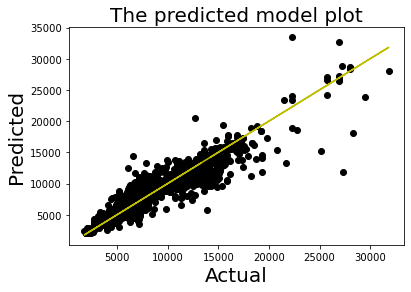

In [91]:
plt.scatter(x=y_test, y=RCV_pred, color = "black")
plt.plot(y_test,y_test, color='y')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()